# Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import config
from joblib import dump, load
import matplotlib.pyplot as plt
from matplotlib import rc
from scipy.stats import wilcoxon
from utils import plot_longitudinal

# Compute GMHI2 scores

In [2]:
study = "P89"

In [3]:
gmhi2 = load(os.path.join(config.MODEL_DIR, "gmhi2_model.joblib"))
gmhi2

LogisticRegression(C=0.03, class_weight='balanced', penalty='l1',
                   random_state=42, solver='liblinear')

In [4]:
X = pd.read_csv(os.path.join(config.CLEAN_DIR, "taxonomic_features_val.csv"), index_col=[0, 1]).loc[study]
X.head()

,k__Archaea,k__Archaea|p__Euryarchaeota,k__Archaea|p__Euryarchaeota|c__Methanobacteria,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera|s__Methanosphaera_stadtmanae,k__Archaea|p__Euryarchaeota|c__Thermoplasmata,...,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Virgaviridae|g__Hordeivirus|s__Barley_stripe_mosaic_virus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Virgaviridae|g__Tobamovirus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Virgaviridae|g__Tobamovirus|s__Cactus_mild_mottle_virus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Virgaviridae|g__Tobamovirus|s__Cucumber_green_mottle_mosaic_virus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Virgaviridae|g__Tobamovirus|s__Paprika_mild_mottle_virus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Virgaviridae|g__Tobamovirus|s__Pepper_mild_mottle_virus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Virgaviridae|g__Tobamovirus|s__Tobacco_mild_green_mosaic_virus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Viruses_unclassified|g__Viruses_unclassified|s__Deep_sea_thermophilic_phage_D6E,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Viruses_unclassified|g__Viruses_unclassified|s__Loktanella_phage_pCB2051_A,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Viruses_unclassified|g__Viruses_unclassified|s__Tetraselmis_viridis_virus_S1
Sample Accession,,,,,,,,,,,,,,,,,,,,,
SAMN17171498,0.001768,0.001768,0.001768,0.001768,0.001768,0.001768,0.001768,0.000000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
SAMN17171499,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
SAMN17171500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
SAMN17171508,0.094726,0.094726,0.094726,0.094726,0.094726,0.091457,0.091457,0.003268,0.003268,0.0,...,0,0,0,0,0,0,0,0,0,0
SAMN17171509,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
meta = pd.read_csv(os.path.join(config.CLEAN_DIR, "metadata_val.csv"), index_col=[0, 1, 2]).loc[study]
meta["GMHI2"] = gmhi2.decision_function(X > config.PRESENCE_CUTOFF)
meta.index = meta.index.get_level_values(1)
meta.head()

,health_status/host_diet,timepoint,GMHI2
Subject_ID,,,
S141,Healthy,T1,1.683239
S148,Healthy,T0,2.680812
S148,Healthy,T1,2.248741
S161,Healthy,T1,1.566004
S174,Healthy,T0,1.348567


# Compute other indices

In [6]:
X_species = X[[col for col in X.columns if "s__" in col and "virus" not in col and "unclassified" not in col]]
X_species.head()

,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera|s__Methanosphaera_stadtmanae,k__Archaea|p__Euryarchaeota|c__Thermoplasmata|o__Methanomassiliicoccales|f__Methanomassiliicoccaceae|g__Methanomassiliicoccus|s__Candidatus_Methanomassiliicoccus_intestinalis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinobaculum|s__Actinobaculum_sp_oral_taxon_183,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_cardiffensis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_georgiae,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_graevenitzii,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_hongkongensis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_johnsonii,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_massiliensis,...,k__Bacteria|p__Spirochaetes|c__Spirochaetia|o__Spirochaetales|f__Borreliaceae|g__Borreliella|s__Borreliella_garinii,k__Bacteria|p__Spirochaetes|c__Spirochaetia|o__Spirochaetales|f__Spirochaetaceae|g__Treponema|s__Treponema_lecithinolyticum,k__Bacteria|p__Spirochaetes|c__Spirochaetia|o__Spirochaetales|f__Spirochaetaceae|g__Treponema|s__Treponema_maltophilum,k__Bacteria|p__Spirochaetes|c__Spirochaetia|o__Spirochaetales|f__Spirochaetaceae|g__Treponema|s__Treponema_medium,k__Bacteria|p__Spirochaetes|c__Spirochaetia|o__Spirochaetales|f__Spirochaetaceae|g__Treponema|s__Treponema_vincentii,k__Bacteria|p__Synergistetes|c__Synergistia|o__Synergistales|f__Synergistaceae|g__Acetomicrobium|s__Acetomicrobium_flavidum,k__Bacteria|p__Synergistetes|c__Synergistia|o__Synergistales|f__Synergistaceae|g__Cloacibacillus|s__Cloacibacillus_sp_An23,k__Bacteria|p__Tenericutes|c__Mollicutes|o__Acholeplasmatales|f__Acholeplasmataceae|g__Candidatus_Phytoplasma|s__Aster_yellows_witches_broom_phytoplasma,k__Bacteria|p__Tenericutes|c__Mollicutes|o__Mycoplasmatales|f__Mycoplasmataceae|g__Mycoplasma|s__Mycoplasma_bovis,k__Bacteria|p__Tenericutes|c__Mollicutes|o__Mycoplasmatales|f__Mycoplasmataceae|g__Mycoplasma|s__Mycoplasma_sp_HU2014
Sample Accession,,,,,,,,,,,,,,,,,,,,,
SAMN17171498,0.001768,0.000000,0.0,0.0,0.0,0,0.000000,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
SAMN17171499,0.000000,0.000000,0.0,0.0,0.0,0,0.000000,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
SAMN17171500,0.000000,0.000000,0.0,0.0,0.0,0,0.000137,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
SAMN17171508,0.091457,0.003268,0.0,0.0,0.0,0,0.000000,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
SAMN17171509,0.000000,0.000000,0.0,0.0,0.0,0,0.000000,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
meta["Species Richness"] = np.sum(X_species > config.PRESENCE_CUTOFF, axis=1).values
meta.head()

,health_status/host_diet,timepoint,GMHI2,Species Richness
Subject_ID,,,,
S141,Healthy,T1,1.683239,61
S148,Healthy,T0,2.680812,67
S148,Healthy,T1,2.248741,69
S161,Healthy,T1,1.566004,57
S174,Healthy,T0,1.348567,82


In [8]:
meta["Shannon Diversity"] = np.sum(-1 * (X_species * np.log(X_species)).fillna(0).values, axis=1)
meta.head()

,health_status/host_diet,timepoint,GMHI2,Species Richness,Shannon Diversity
Subject_ID,,,,,
S141,Healthy,T1,1.683239,61,2.235231
S148,Healthy,T0,2.680812,67,2.116307
S148,Healthy,T1,2.248741,69,2.280313
S161,Healthy,T1,1.566004,57,2.784812
S174,Healthy,T0,1.348567,82,3.103211


In [13]:
meta["Simpson Diversity"] = np.sum((X_species ** 2).values, axis=1)
meta.head()

,health_status/host_diet,timepoint,GMHI2,Species Richness,Shannon Diversity,timepoint_plot,Simpson Diversity
Subject_ID,,,,,,,
S141,Healthy,T1,1.683239,61,2.235231,1,0.254008
S148,Healthy,T0,2.680812,67,2.116307,0,0.309148
S148,Healthy,T1,2.248741,69,2.280313,1,0.233562
S161,Healthy,T1,1.566004,57,2.784812,1,0.098686
S174,Healthy,T0,1.348567,82,3.103211,0,0.061892


# Plot stuff now 

In [14]:
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

In [15]:
meta["timepoint_plot"] = [int(time[1:]) for time in meta["timepoint"]]
meta.head()

,health_status/host_diet,timepoint,GMHI2,Species Richness,Shannon Diversity,timepoint_plot,Simpson Diversity
Subject_ID,,,,,,,
S141,Healthy,T1,1.683239,61,2.235231,1,0.254008
S148,Healthy,T0,2.680812,67,2.116307,0,0.309148
S148,Healthy,T1,2.248741,69,2.280313,1,0.233562
S161,Healthy,T1,1.566004,57,2.784812,1,0.098686
S174,Healthy,T0,1.348567,82,3.103211,0,0.061892


In [16]:
timepoints_sorted = sorted(list(meta["timepoint"].unique()), key=lambda x : int(x[1:]))
timepoints_sorted

['T0', 'T1']

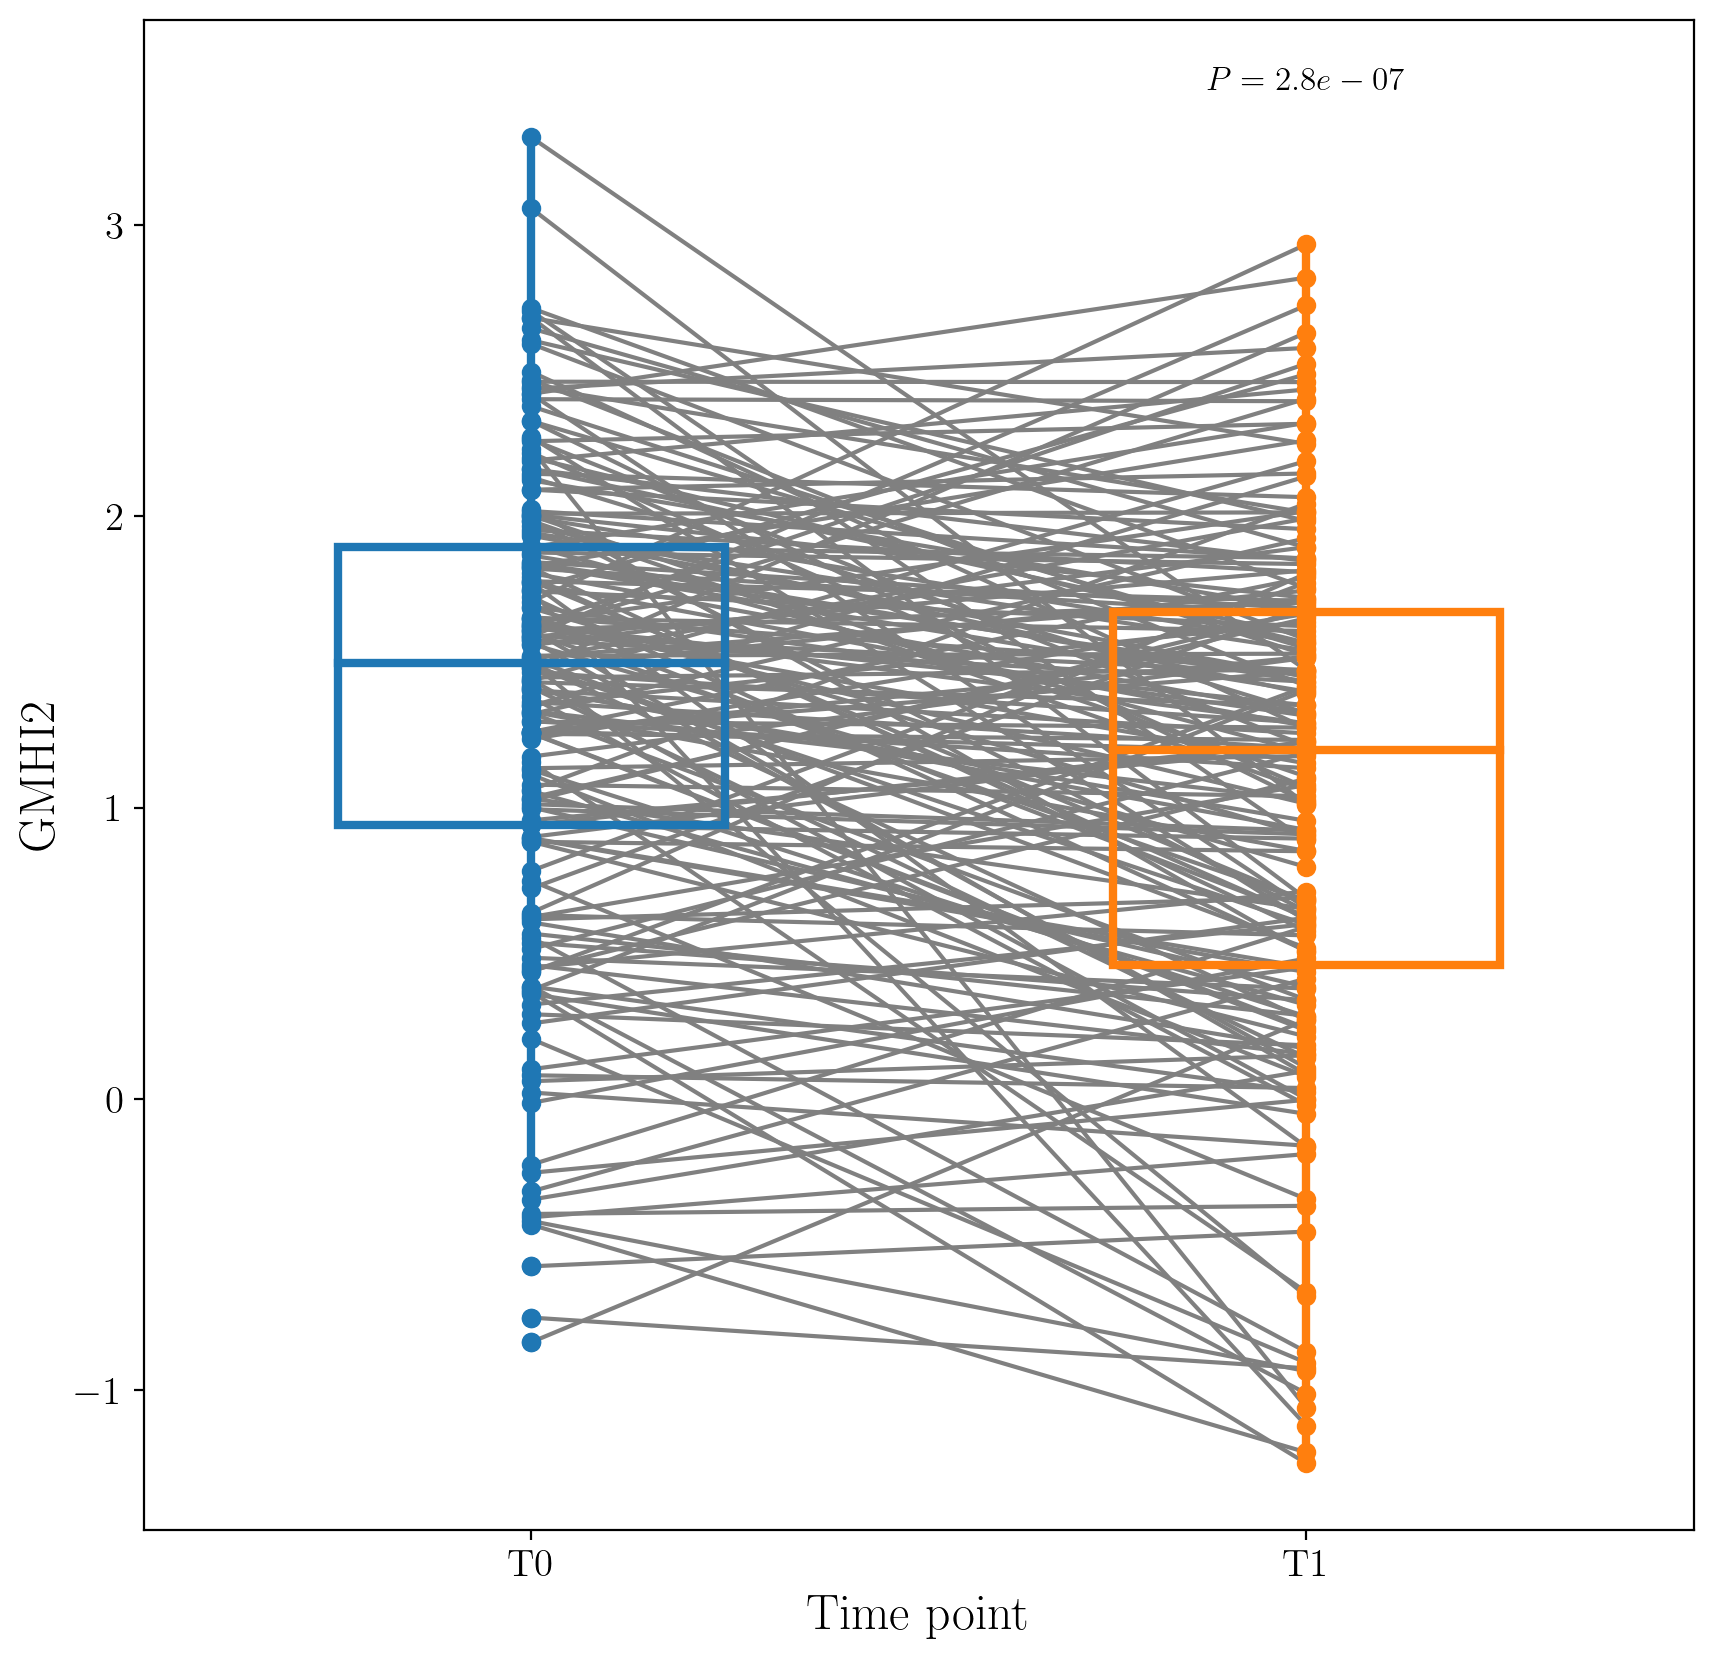

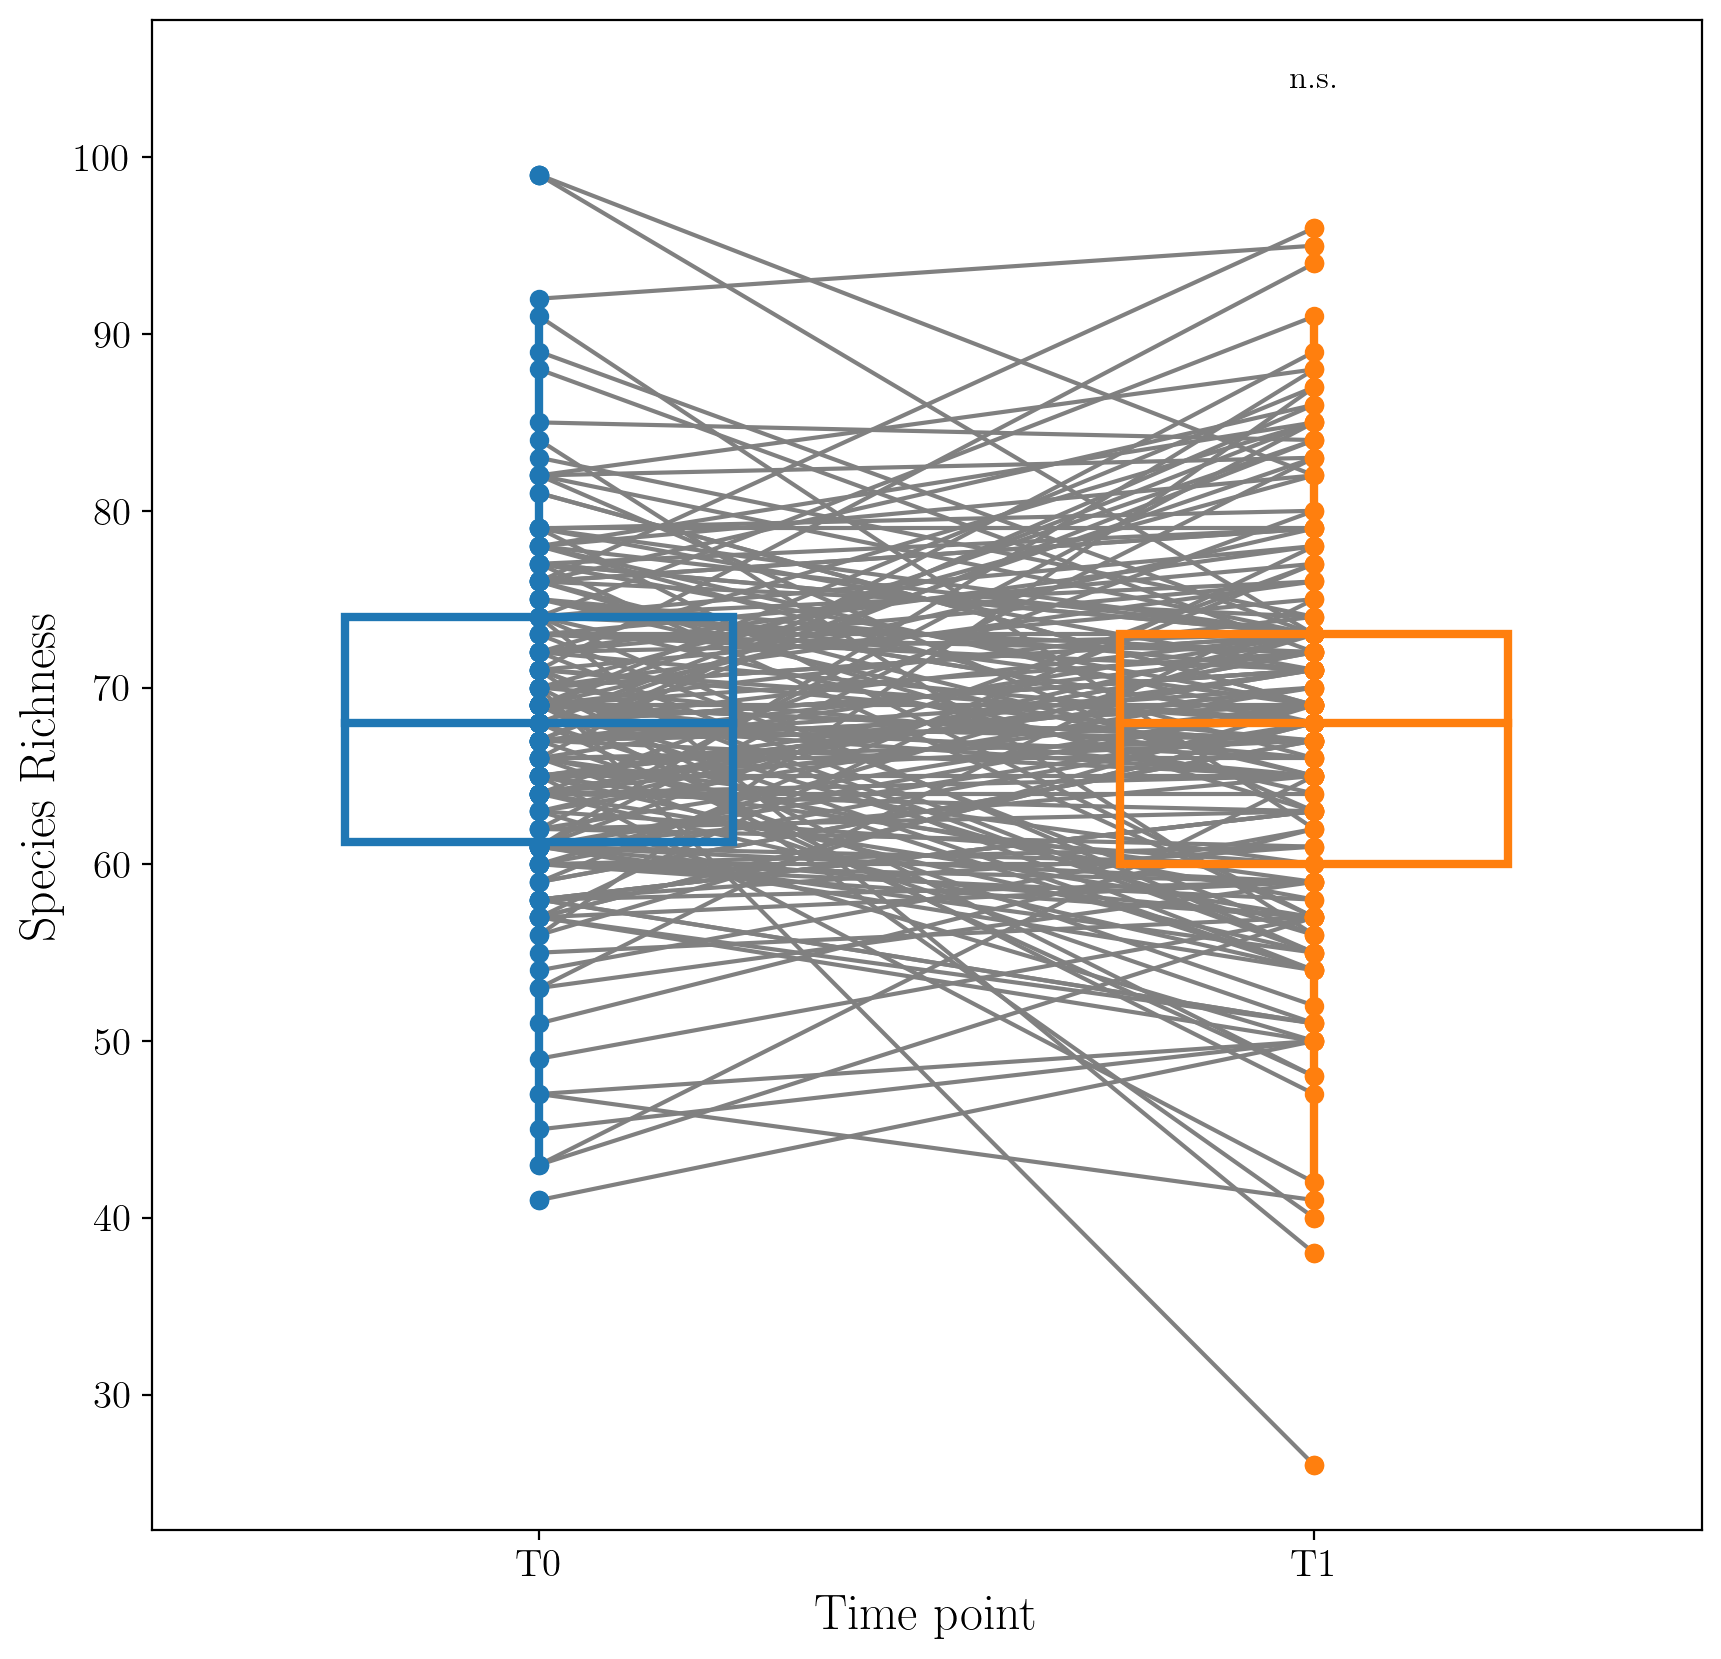

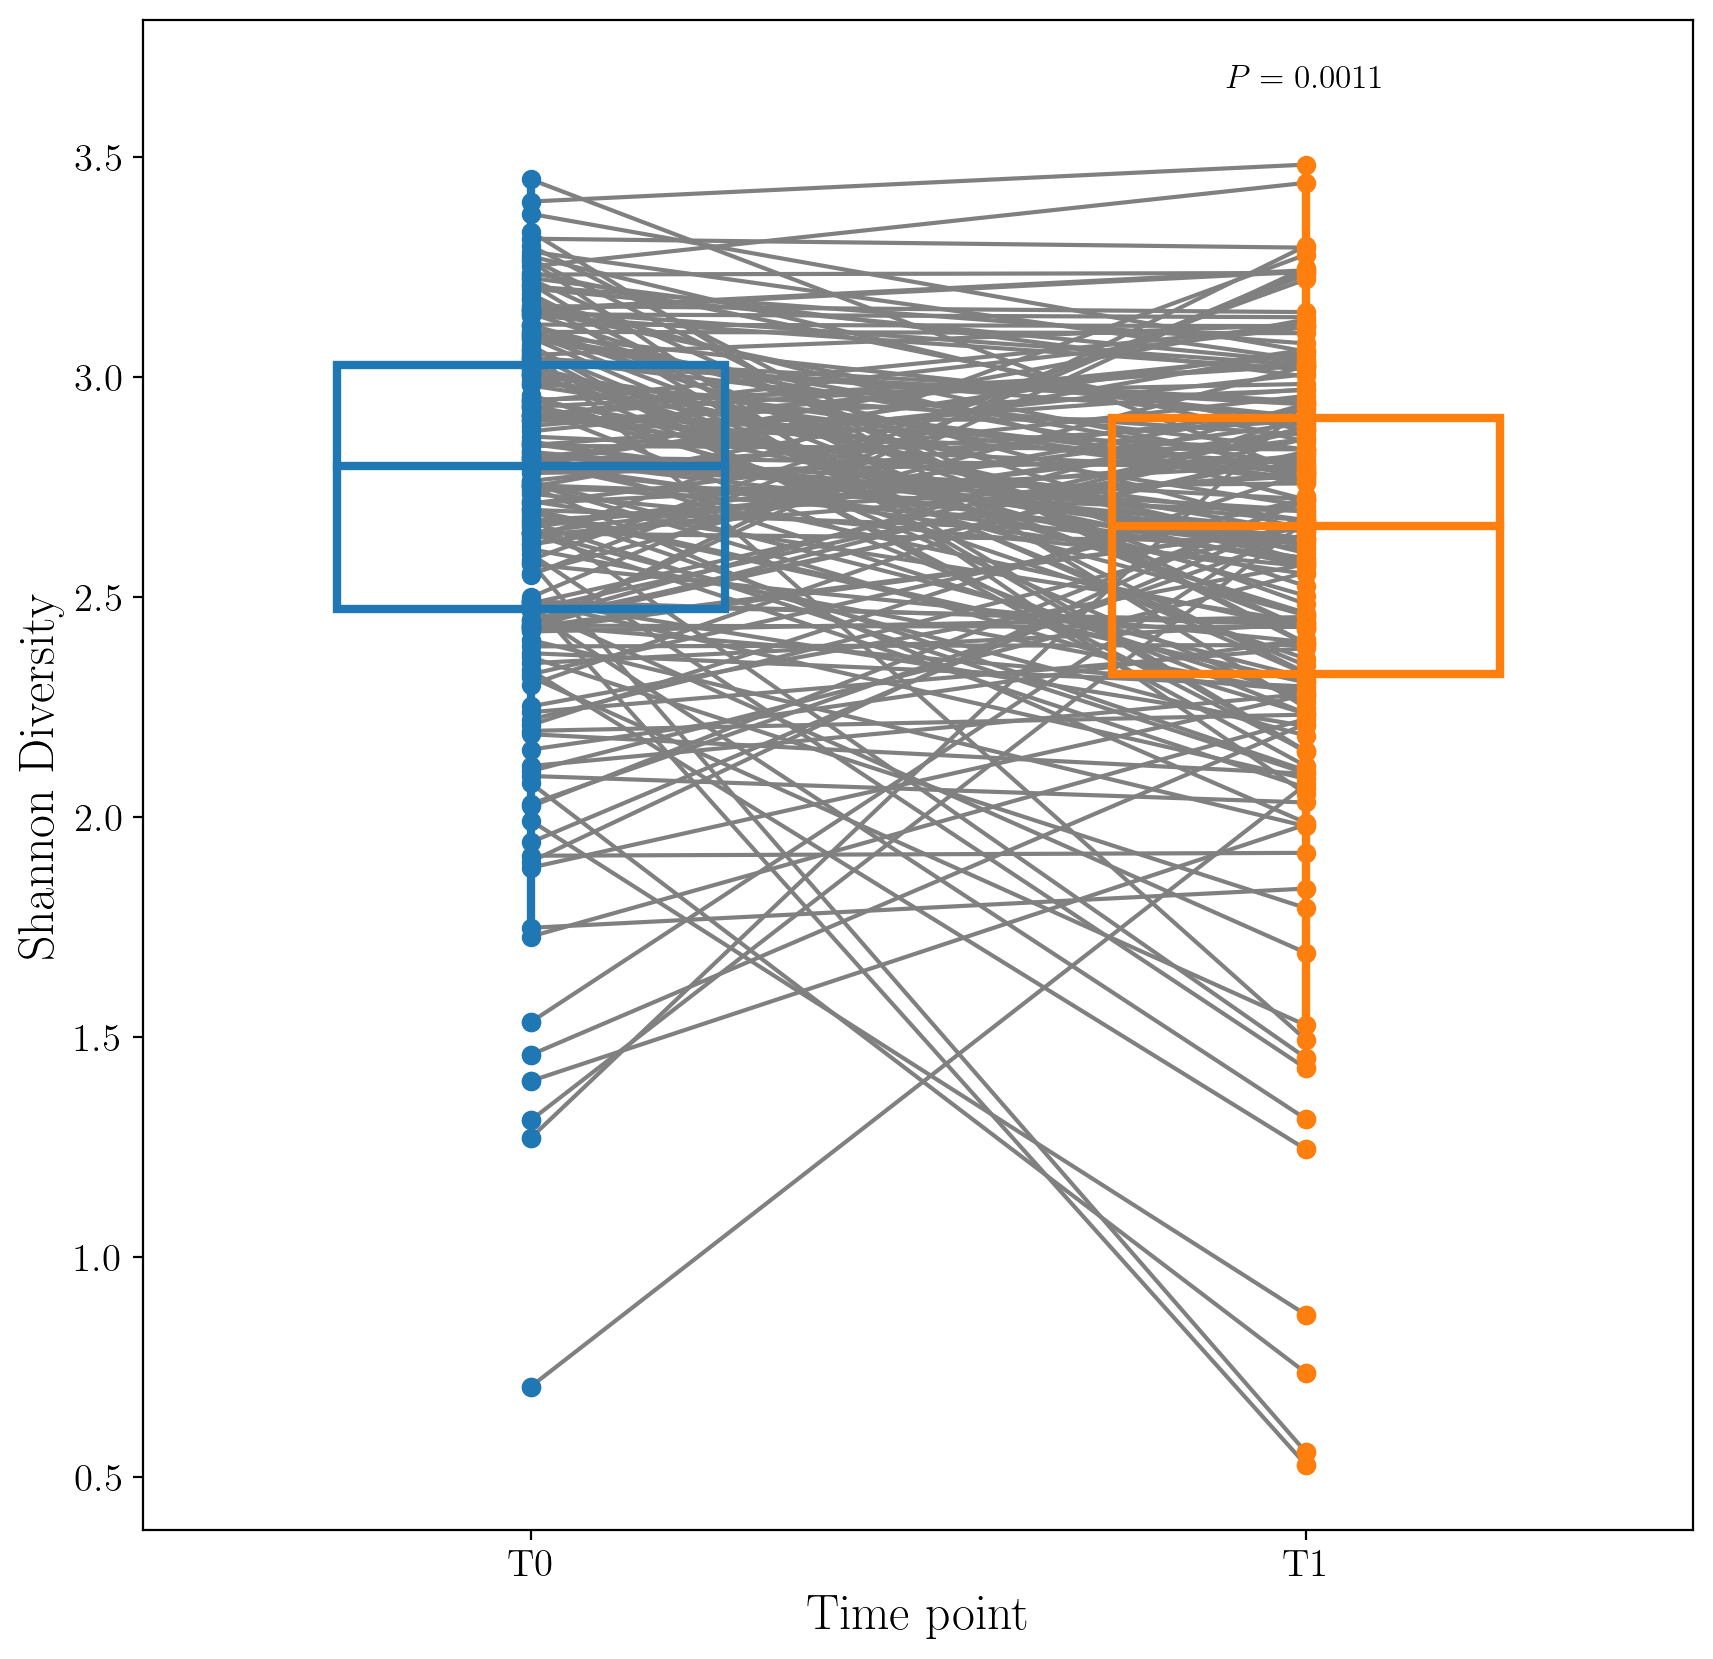

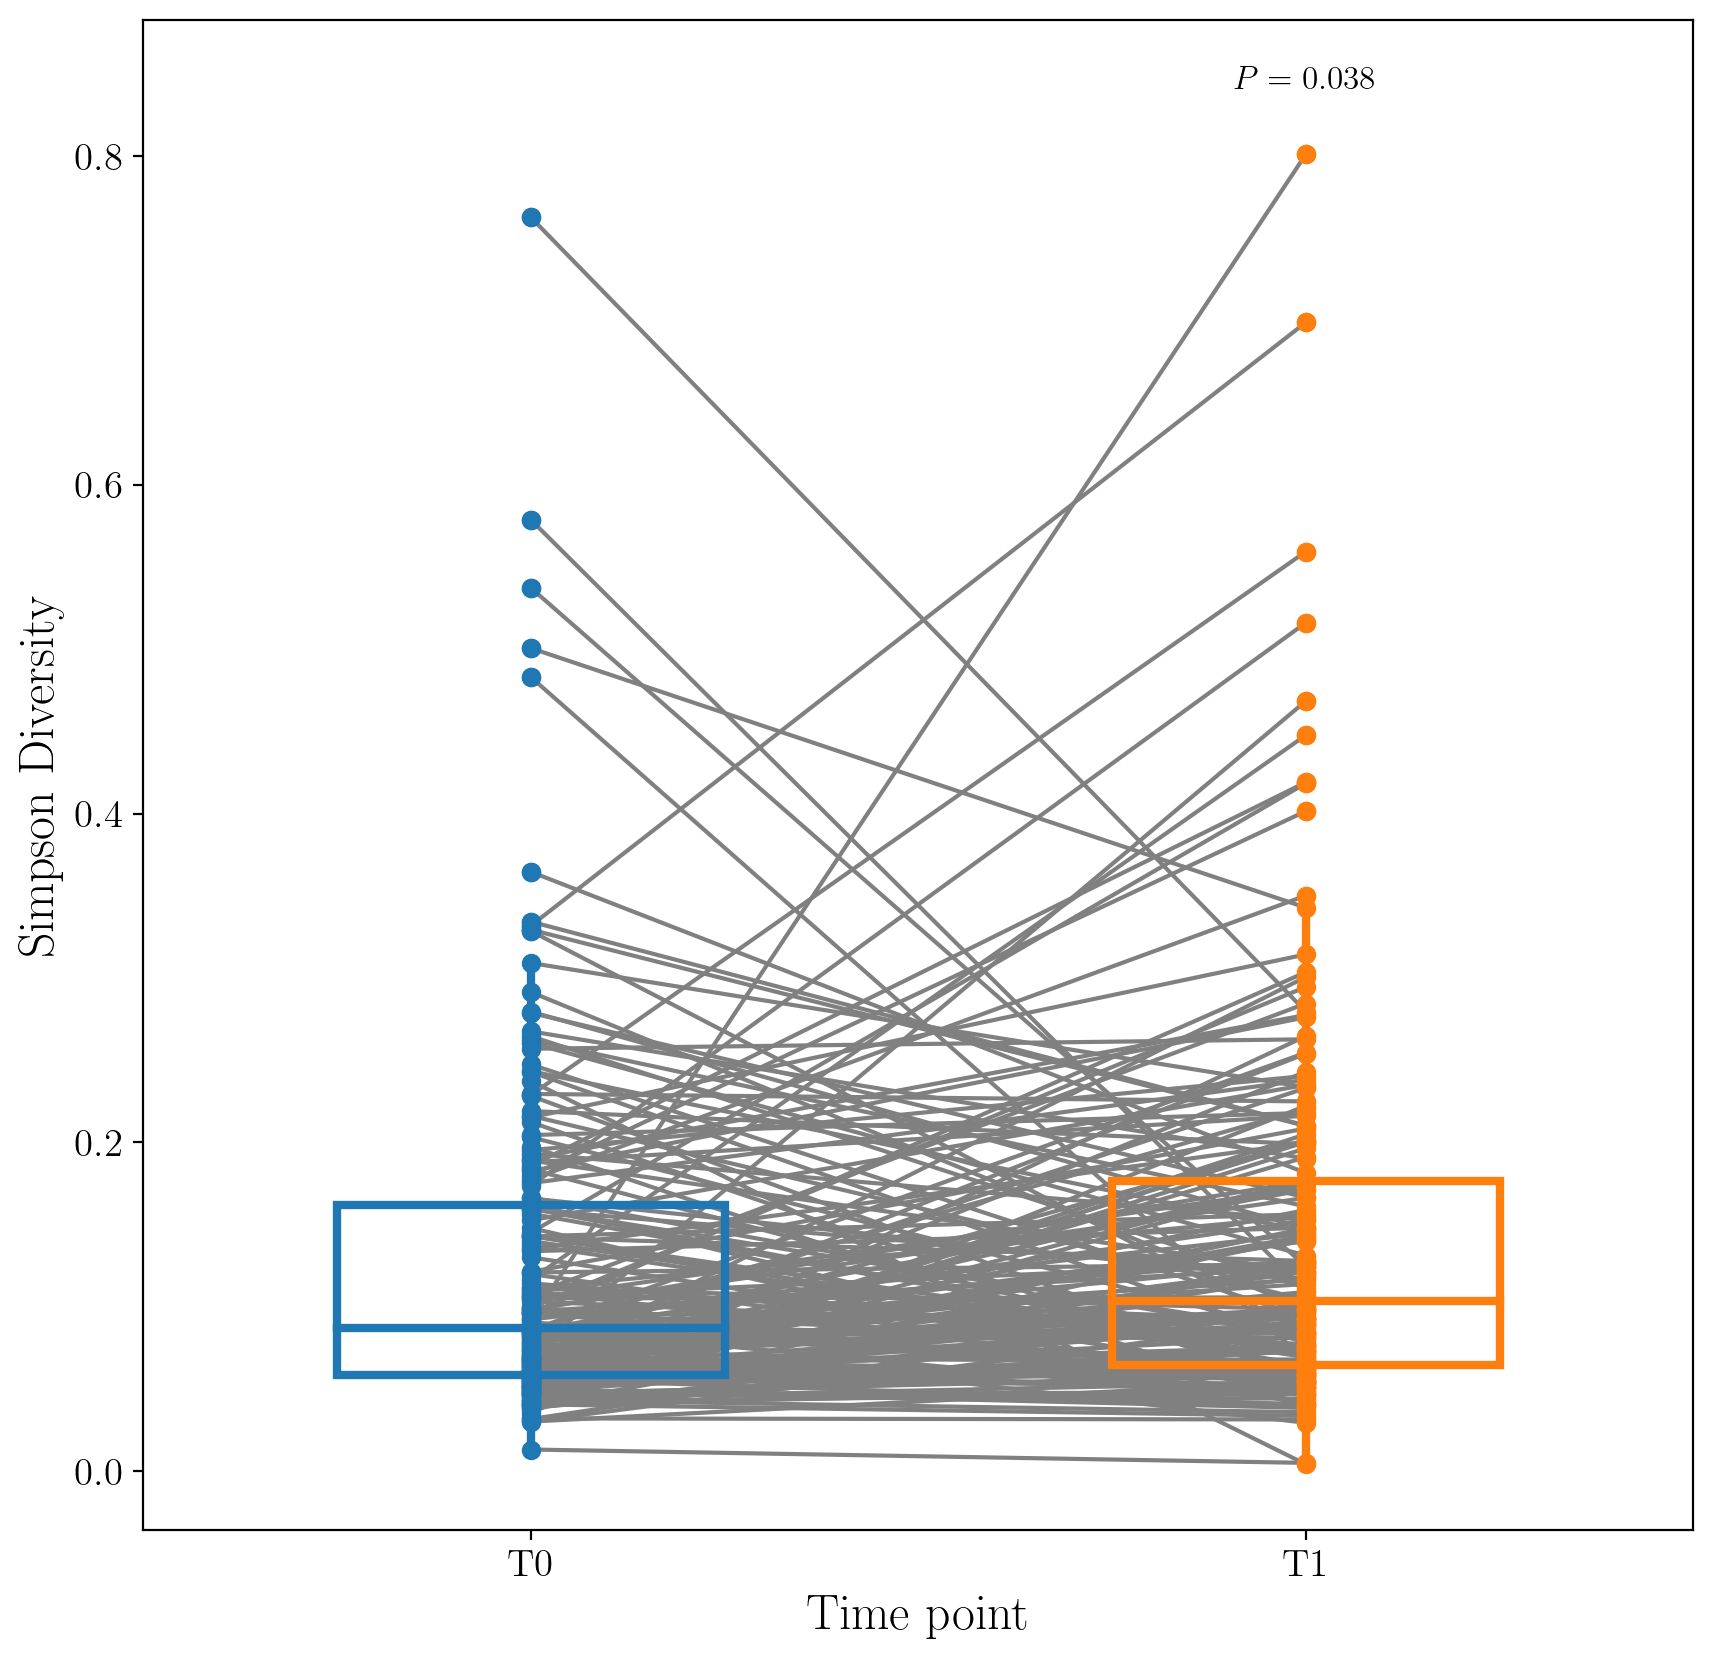

In [17]:
plot_longitudinal(meta, "GMHI2", timepoints_sorted, study)
plot_longitudinal(meta, "Species Richness", timepoints_sorted, study)
plot_longitudinal(meta, "Shannon Diversity", timepoints_sorted, study)
plot_longitudinal(meta, "Simpson Diversity", timepoints_sorted, study)